ادخل رابط التغريدة أو الهاشتاج: https://x.com/AdameMedia/status/1918050682742919258
عدد التغريدات (إذا كان هاشتاج): 3
النص:
Israel is still burning. 

Will you pray for them?



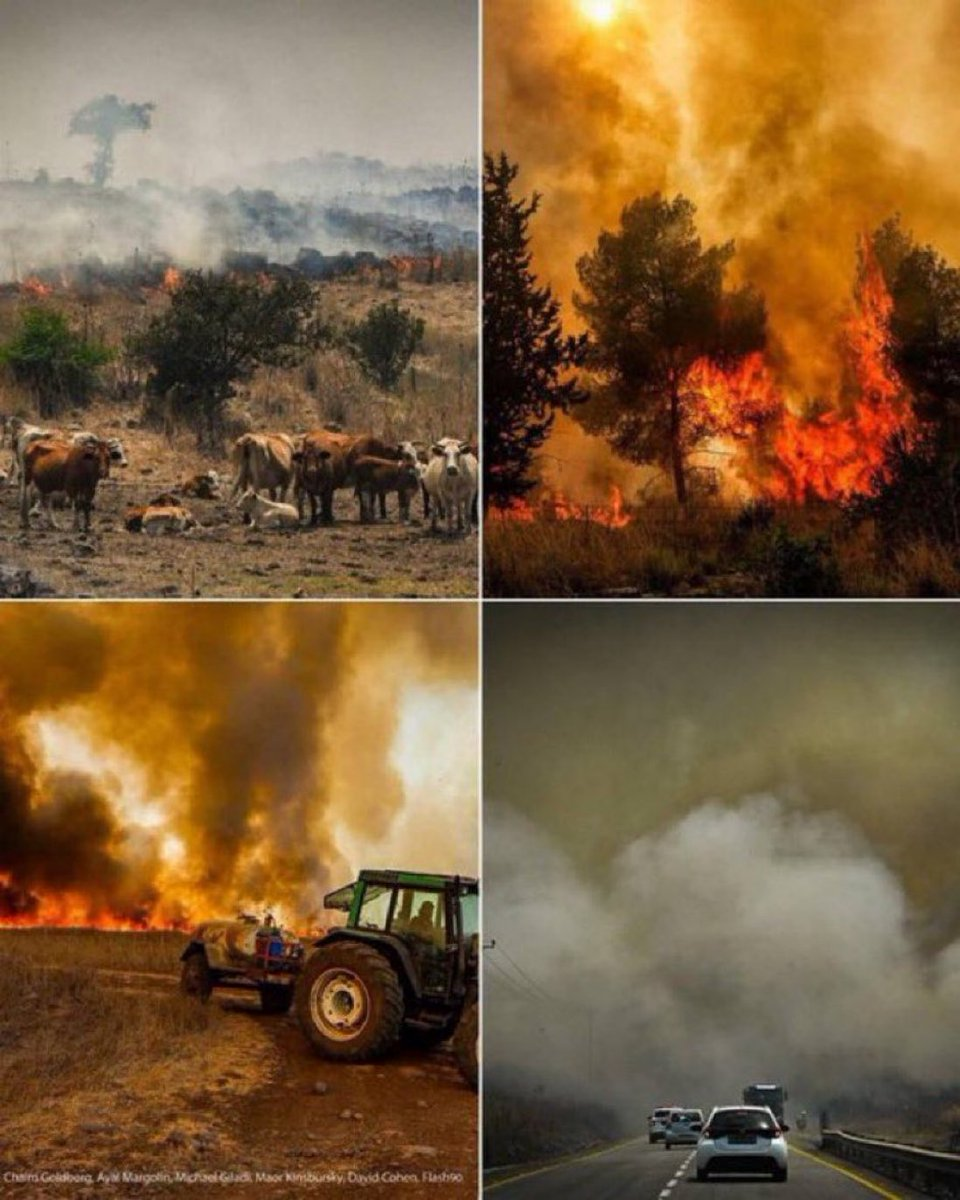

In [4]:
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.options import Options
from urllib.parse import urlparse
from IPython.display import display, Image

# مسار WebDriver
driver_path = "C:/Users/User/Downloads/msedgedriver.exe"  # غيّره حسب مكان الملف عندك

# إعدادات المتصفح
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Edge(service=Service(driver_path), options=options)

# === مدخلات المستخدم ===
link = input("ادخل رابط التغريدة أو الهاشتاج: ").strip()
max_tweets = int(input("عدد التغريدات (إذا كان هاشتاج): ").strip() or 1)

# مجلد لحفظ الصور
os.makedirs("twitter_images", exist_ok=True)

def scroll_down(pause_time=2, scrolls=5):
    for _ in range(scrolls):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause_time)

def is_hashtag(url):
    return "/hashtag/" in url

def extract_from_tweet_page(url):
    driver.get(url)
    time.sleep(4)
    try:
        tweet_text = driver.find_element(By.XPATH, '//div[@data-testid="tweetText"]').text
        print(f"النص:\n{tweet_text}\n")
        
        images = driver.find_elements(By.XPATH, '//img[contains(@src, "twimg.com/media")]')
        for i, img in enumerate(images):
            img_url = img.get_attribute("src")
            if "profile_images" in img_url or img_url.endswith(".png"):
                continue
            response = requests.get(img_url)
            with open(f"twitter_images/tweet_image_{i}.jpg", "wb") as f:
                f.write(response.content)
            display(Image(filename=f"twitter_images/tweet_image_{i}.jpg"))
    except Exception as e:
        print(f"[✗] خطأ أثناء استخراج التغريدة: {e}")

def extract_from_hashtag(url, max_count=3):
    driver.get(url)
    time.sleep(3)
    tweets_collected = 0
    scrolls = 0

    while tweets_collected < max_count and scrolls < 20:
        tweets = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')
        for tweet in tweets[tweets_collected:]:
            try:
                text = tweet.find_element(By.XPATH, './/div[@data-testid="tweetText"]').text
                print(f"\n[✓] التغريدة {tweets_collected+1}:\n{text}")
                imgs = tweet.find_elements(By.XPATH, './/img[contains(@src, "twimg.com/media")]')
                for j, img in enumerate(imgs):
                    img_url = img.get_attribute("src")
                    if "profile_images" in img_url or img_url.endswith(".png"):
                        continue
                    response = requests.get(img_url)
                    filename = f"twitter_images/hashtag_{tweets_collected}_{j}.jpg"
                    with open(filename, "wb") as f:
                        f.write(response.content)
                    display(Image(filename=filename))
                tweets_collected += 1
                if tweets_collected >= max_count:
                    break
            except Exception:
                continue
        scroll_down(scrolls=1)
        scrolls += 1

# تحديد نوع الرابط وتنفيذ المناسب
if is_hashtag(link):
    extract_from_hashtag(link, max_count=max_tweets)
else:
    extract_from_tweet_page(link)

driver.quit()


In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
import time
import requests

# بيانات الدخول (من الأفضل إدخالها عند التشغيل لحماية الخصوصية)
USERNAME = input("Username or email: ")
PASSWORD = input("Password: ")

# إعداد مجلد الصور
if not os.path.exists("media"):
    os.makedirs("media")

# إعداد المتصفح Edge
edge_path = r"C:\Users\User\Downloads\msedgedriver.exe"
options = Options()
options.add_argument("--start-maximized")
service = Service(executable_path=edge_path)
driver = webdriver.Edge(service=service, options=options)
wait = WebDriverWait(driver, 20)

# دالة لتسجيل الدخول إلى تويتر
def twitter_login():
    driver.get("https://x.com/login")
    try:
        username_input = wait.until(EC.presence_of_element_located((By.NAME, "text")))
        username_input.send_keys(USERNAME)
        username_input.send_keys(Keys.RETURN)

        password_input = wait.until(EC.presence_of_element_located((By.NAME, "password")))
        password_input.send_keys(PASSWORD)
        password_input.send_keys(Keys.RETURN)

        wait.until(EC.presence_of_element_located((By.XPATH, '//nav')))
        print("[✓] تم تسجيل الدخول بنجاح.")
    except Exception as e:
        print("[✗] فشل تسجيل الدخول:", e)

# دالة لاستخراج نصوص وصور من تغريدة واحدة
def extract_from_tweet(tweet_url):
    driver.get(tweet_url)
    time.sleep(5)

    texts = []
    try:
        tweet_text_elem = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@data-testid="tweetText"]')))
        text = tweet_text_elem.text.strip()
        texts.append(text)
    except Exception as e:
        print("[✗] خطأ أثناء استخراج النص:", e)

    try:
        image_elements = driver.find_elements(By.XPATH, '//img[contains(@src, "twimg.com/media")]')
        for idx, img in enumerate(image_elements):
            src = img.get_attribute('src')
            img_data = requests.get(src).content
            filename = os.path.join("media", f"tweet_image_{idx+1}.jpg")
            with open(filename, 'wb') as f:
                f.write(img_data)
    except Exception as e:
        print("[!] لم يتم استخراج صور:", e)

    return texts

# دالة لاستخراج من هاشتاج
def extract_from_hashtag(hashtag_url, limit=5):
    driver.get(hashtag_url)
    time.sleep(5)

    texts = []
    seen = set()
    last_height = driver.execute_script("return document.body.scrollHeight")

    while len(texts) < limit:
        tweet_divs = driver.find_elements(By.XPATH, '//div[@data-testid="cellInnerDiv"]')
        for div in tweet_divs:
            try:
                tweet_text_elem = div.find_element(By.XPATH, './/div[@data-testid="tweetText"]')
                tweet_text = tweet_text_elem.text.strip()
                if tweet_text not in seen:
                    seen.add(tweet_text)
                    texts.append(tweet_text)

                image_elements = div.find_elements(By.XPATH, './/img[contains(@src, "twimg.com/media")]')
                for idx, img in enumerate(image_elements):
                    src = img.get_attribute('src')
                    img_data = requests.get(src).content
                    filename = os.path.join("media", f"hashtag_image_{len(texts)}_{idx+1}.jpg")
                    with open(filename, 'wb') as f:
                        f.write(img_data)

                if len(texts) >= limit:
                    break
            except:
                continue

        # التمرير للأسفل
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    return texts

# ====== واجهة التشغيل ======
url = input("أدخل رابط التغريدة أو الهاشتاج: ").strip()
if "/status/" in url:
    twitter_login()
    extracted_texts = extract_from_tweet(url)
elif "/hashtag/" in url or url.startswith("https://x.com/search?q=%23"):
    tweet_limit = int(input("عدد التغريدات (إذا كان هاشتاج): "))
    twitter_login()
    extracted_texts = extract_from_hashtag(url, tweet_limit)
else:
    print("❌ الرابط غير صحيح.")
    extracted_texts = []

# طباعة النصوص المستخرجة
print("\n==== النصوص المستخرجة ====")
for i, txt in enumerate(extracted_texts, 1):
    print(f"{i} - {txt}")


Username or email: moatazabdo865
Password: Abdo2244
أدخل رابط التغريدة أو الهاشتاج: https://x.com/AdameMedia/status/1918050682742919258
[✓] تم تسجيل الدخول بنجاح.

==== النصوص المستخرجة ====
1 - Israel is still burning. 

Will you pray for them?


In [ ]:
TWITTER_USERNAME = "moatazabdo865"
TWITTER_PASSWORD = "Abdo2244"